In [1]:
# if on Google Colab
from google.colab import files
import pandas as pd
import io
import ast

uploaded = files.upload()

Saving second_dataset.csv to second_dataset.csv


In [0]:
df_org = pd.read_csv(io.StringIO(uploaded['second_dataset.csv'].decode('utf-8')))
# if not on Google Colab, just do:
# df_org = pd.read_csv('second_dataset.csv')

In [0]:
split_field = df_org['spacegroup'].apply(lambda x: ast.literal_eval(x))


In [0]:
addon = pd.DataFrame(split_field.values.tolist(), index=split_field.index)

In [0]:
rev_df = df_org.drop(columns=['spacegroup'])
df = pd.concat([rev_df, addon], axis=1)


In [164]:
df.head()

,pretty_formula,energy,density,icsd_ids,unit_cell_formula,crystal_system,hall,number,point_group,source,symbol
0,Cs,-0.858819,1.935217,"[626969, 44754, 76941, 626975, 426937]",{'Cs': 1.0},cubic,-I 4 2 3,229,m-3m,spglib,Im-3m
1,As,-9.101331,6.064411,"[162840, 162838, 162836, 162841, 162842, 15847...",{'As': 2.0},cubic,-P 4 2 3,221,m-3m,spglib,Pm-3m
2,Hf,-9.773154,13.343941,"[76412, 638608, 104208, 53023]",{'Hf': 1.0},cubic,-I 4 2 3,229,m-3m,spglib,Im-3m
3,BaTe,-8.647345,4.937886,"[616165, 616163, 29152, 43656]","{'Te': 1.0, 'Ba': 1.0}",cubic,-F 4 2 3,225,m-3m,spglib,Fm-3m
4,Hf2S,-54.265245,11.035292,[43203],"{'S': 2.0, 'Hf': 4.0}",hexagonal,-P 6c 2c,194,6/mmm,spglib,P6_3/mmc


In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.describe())
print()
df.info() # all data seems intact other than 2 items with no pretty_formula

             energy       density        number
count  83989.000000  83989.000000  83989.000000
mean    -171.822498      5.014147     88.704759
std      185.554043      2.777373     79.398033
min    -1834.877179      0.023670      1.000000
25%     -235.703841      3.106744     14.000000
50%     -107.725258      4.297990     62.000000
75%      -40.486961      6.405995    160.000000
max       -0.016100     24.579228    230.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83989 entries, 0 to 83988
Data columns (total 11 columns):
pretty_formula       83987 non-null object
energy               83989 non-null float64
density              83989 non-null float64
icsd_ids             83989 non-null object
unit_cell_formula    83989 non-null object
crystal_system       83989 non-null object
hall                 83989 non-null object
number               83989 non-null int64
point_group          83989 non-null object
source               83989 non-null object
symbol               83989 

In [166]:
df[df['pretty_formula'].isna() == True] # the two missing materials, might be important

,pretty_formula,energy,density,icsd_ids,unit_cell_formula,crystal_system,hall,number,point_group,source,symbol
580,NaN,-7.102034,1.966078,[184990],"{'Na': 1.0, 'N': 1.0}",cubic,-F 4 2 3,225,m-3m,spglib,Fm-3m
11623,NaN,-37.747211,1.438155,[25633],"{'Na': 4.0, 'N': 4.0}",orthorhombic,F 2 2 -1d,70,mmm,spglib,Fddd


In [167]:
df.corr() # high correlations (social science standard) between all 3 variables

,energy,density,number
energy,1.000000,0.237095,0.323075
density,0.237095,1.000000,0.403033
number,0.323075,0.403033,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70333f6f28>,
      dtype=object)

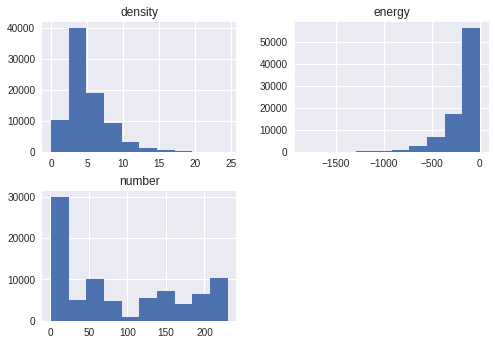

In [184]:
df.hist(bins=10)

In [168]:
print(len(df['point_group'].value_counts())) # 32 groups overall
print()
df['point_group'].value_counts()[:5] # some of these groups are quite big


32



2/m      13993
mmm      13562
m-3m      8590
4/mmm     8175
1         5264
Name: point_group, dtype: int64

In [169]:
df['crystal_system'].value_counts() # six different crystal systems

monoclinic      19436
orthorhombic    19423
cubic           11189
tetragonal      10815
triclinic        9557
trigonal         7213
hexagonal        6356
Name: crystal_system, dtype: int64

In [170]:
len(df['number'].value_counts()) # 223 numbers represented

223

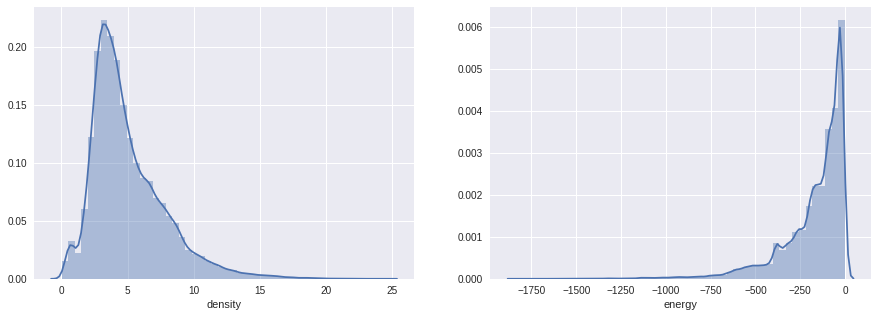

In [171]:
f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=False)
sns.despine(left=True)

sns.distplot(df['density'], ax=axes[0])
sns.distplot(df['energy'], ax=axes[1])  # two distinctive distributions

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


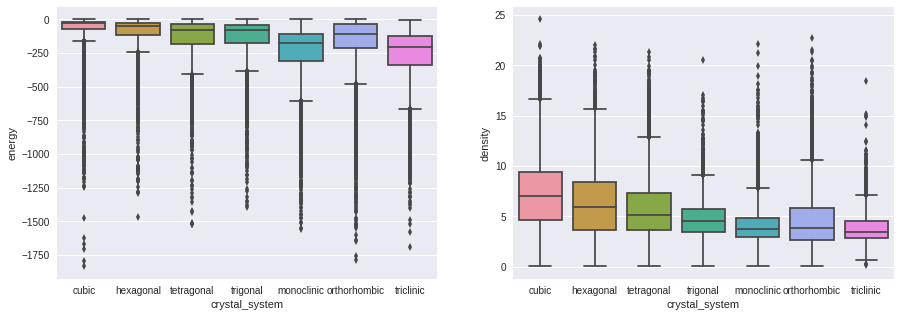

In [172]:
f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=False)
sns.despine(left=True)

sns.boxplot(x=df['crystal_system'], y=df['energy'],ax=axes[0]) # no strong effect it seems
sns.boxplot(x=df['crystal_system'], y=df['density'],ax=axes[1]) # no strong effect it seems

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


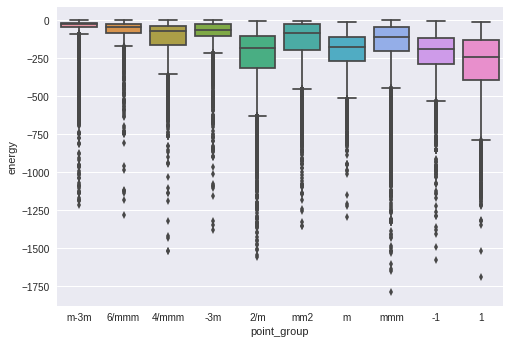

In [173]:
largest_point_groups = df['point_group'].value_counts()[:10] # largest point groups
df2 = df[df['point_group'].isin(largest_point_groups.index)]

sns.boxplot(x=df2['point_group'], y=df2['energy']) # some differences but nothing spectacular

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


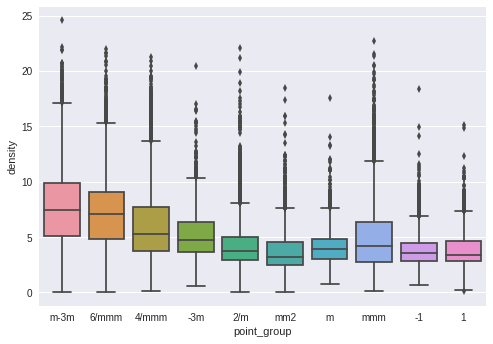

In [174]:
sns.boxplot(x=df2['point_group'], y=df2['density']) # some differences but nothing spectacular


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


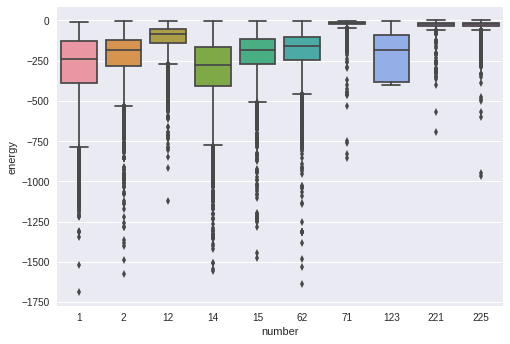

In [175]:
most_frequent_numbers = df['number'].value_counts()[:10] # largest point groups
most_frequent_numbers = most_frequent_numbers.index

df2 = df[df['number'].isin(most_frequent_numbers)]
sns.boxplot(x=df2['number'], y=df2['energy']) # note small spread of 71, 221, 225

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


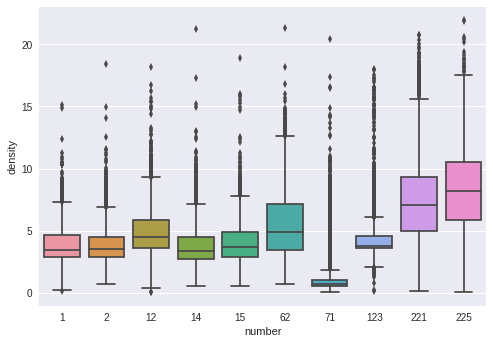

In [176]:
sns.boxplot(x=df2['number'], y=df2['density']) # note 71, also 225 and the small spread of 123

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


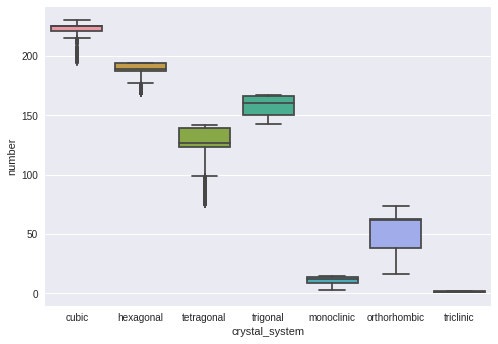

In [177]:
sns.boxplot(x=df['crystal_system'], y=df['number']) 
#strong connection here, probably obvious but wasn't to me; strong relation between crystal_system and number


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


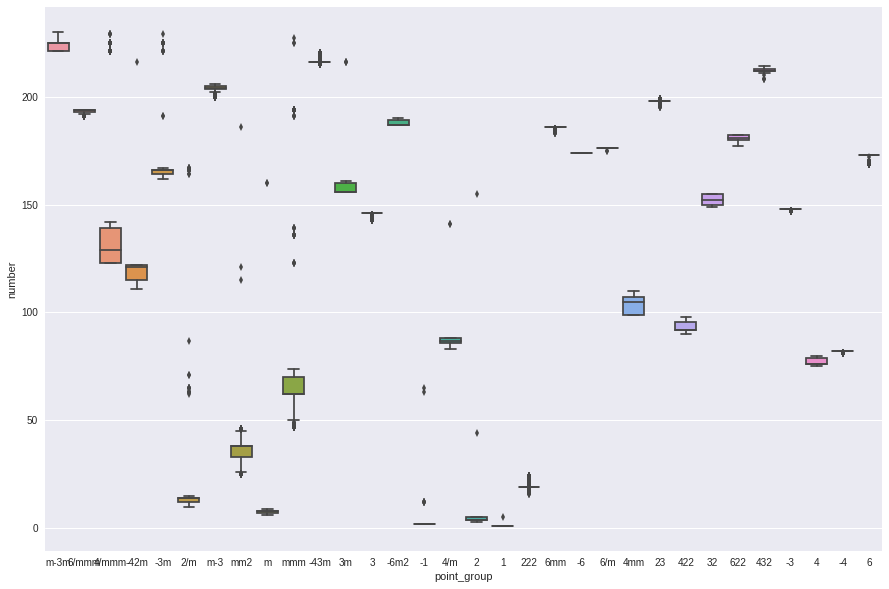

In [178]:
f, axes = plt.subplots(1, 1, figsize=(15, 10), sharex=False)
sns.boxplot(x=df['point_group'], y=df['number'])
# high variety between point_group and number, some are narrow, others are quite wide

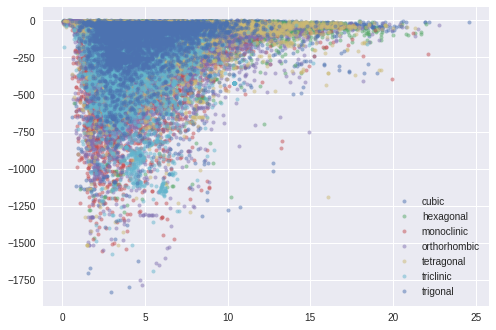

In [179]:
groups = df.groupby('crystal_system')

fig, ax = plt.subplots()
for name, group in groups:
  ax.plot(group['density'], group['energy'], marker='o', linestyle='', label=name, alpha=0.5, ms=4)

ax.legend() #not really distinctive but some effects can be seen 
# - like the low abs(energy) of cubic, or the triclinic bunch around density 5 and energy -1000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f702825ef60>,
      dtype=object)

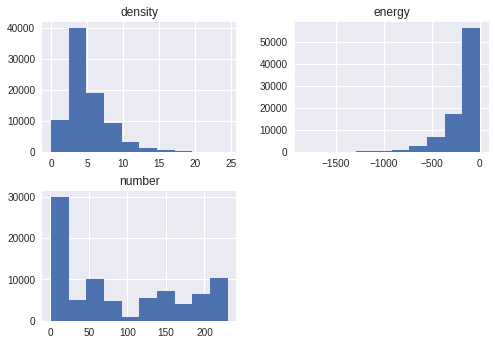

In [191]:
import numpy as np
from sklearn.cross_validation import train_test_split

from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier #Regressor
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score


predictors = ["density", "energy", "number"]
#predicted = ['crystal_system'] # ~99%
predicted = ['point_group'] # ~95%

X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[predicted])

alg = RandomForestClassifier()
kf = KFold(df.shape[0], n_folds=3)
predictions = []

alg.fit(X_train, y_train)
test_predictions = alg.predict(X_test)

cross_val_score(alg, df[predictors],df[predicted])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

array([0.91248304, 0.95735257, 0.97123562])